In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 10 ##

## Prediction ##

In [3]:
galton = Table.read_table('galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


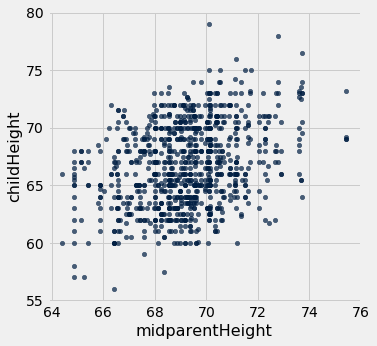

In [4]:
galton.scatter('midparentHeight', 'childHeight')


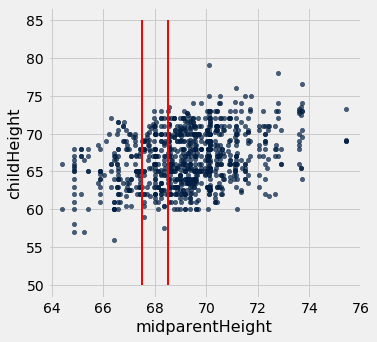

In [5]:
galton.scatter('midparentHeight', 'childHeight')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2);

In [6]:
nearby = galton.where('midparentHeight', are.between(67.5, 68.5))
nearby.column('childHeight').mean()

66.24045801526718

In [7]:
galton.where('midparentHeight', are.between(67.5, 68.5)).column('childHeight').mean()

66.24045801526718

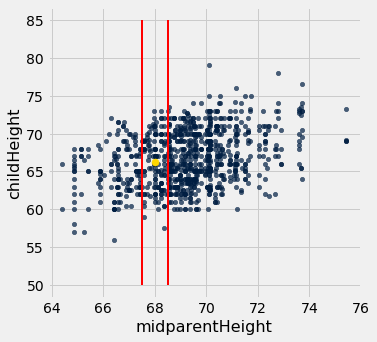

In [8]:
galton.scatter('midparentHeight', 'childHeight')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, 66.24, color='gold', s=50);

In [9]:
def predict(h):
    nearby = galton.where('midparentHeight', are.between(h - 1/2, h + 1/2))
    return nearby.column('childHeight').mean()

In [10]:
predict(68)

66.24045801526718

In [11]:
predict(70)

67.272850678733022

In [12]:
predict(73)

69.5

In [13]:
predicted_heights = galton.apply(predict, 'midparentHeight')

In [14]:
galton = galton.with_column('predictedHeight', predicted_heights)

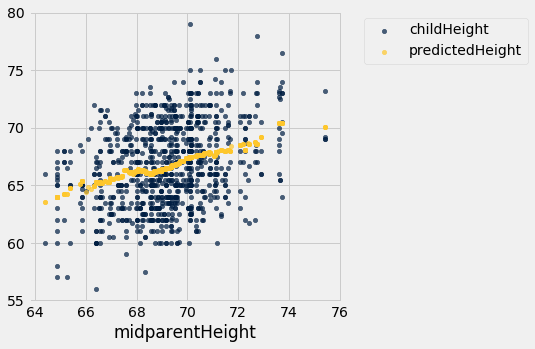

In [15]:
galton.select('midparentHeight', 'childHeight', 'predictedHeight').scatter('midparentHeight')

In [16]:
def difference(x, y):
    return x - y

In [17]:
pred_errs = galton.apply(difference, 'childHeight', 'predictedHeight')

In [18]:
galton = galton.with_column('errors',pred_errs)

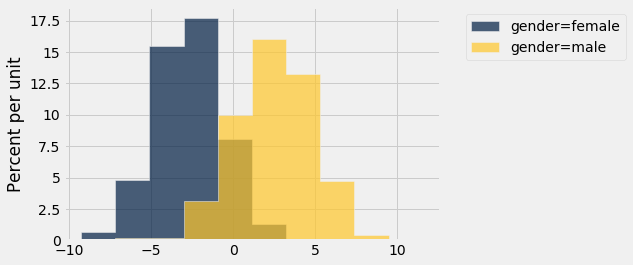

In [19]:
galton.hist('errors', group='gender')

## Apply with Multiple Columns ##

## Grouping by Category ##

In [20]:
cones = Table.read_table('cones.csv')

In [21]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [37]:
cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


In [22]:
cones.drop('Color').group('Flavor', list)

Flavor,Price list
bubblegum,[4.75]
chocolate,"[4.75, 5.25, 5.25]"
strawberry,"[3.5499999999999998, 5.25]"


## Welcome Survey ##

In [23]:
survey = Table.read_table('welcome_survey.csv')

In [24]:
survey.group('Undergrad Year', np.average)

Undergrad Year,Extraversion average,Number of Texters average,Hours of Sleep average,Pant Leg Order average,Handedness average
First,5.82363,8.21164,7.07363,,
Fourth or Higher,5.26061,5.57576,7.13333,,
Second,5.77083,7.075,7.08385,,
Third,5.53361,6.13866,7.12605,,


In [28]:
by_extra = survey.group('Extraversion', np.average)
by_extra

Extraversion,Number of Texters average,Hours of Sleep average,Pant Leg Order average,Handedness average,Undergrad Year average
1,3.59091,6.86364,,,
2,4.27451,7.03922,,,
3,4.82902,7.0544,,,
4,5.38462,7.16896,,,
5,6.63761,7.1422,,,
6,6.72678,7.05191,,,
7,8.07143,7.125,,,
8,9.64762,7.05714,,,
9,11.3714,7.15714,,,
10,13,6.75926,,,


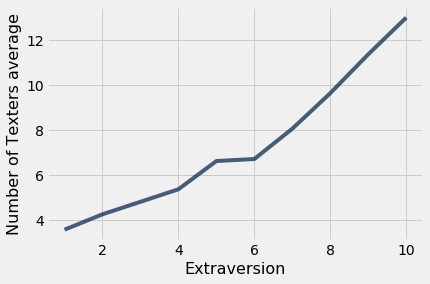

In [29]:
by_extra.select(0,1).plot('Extraversion')

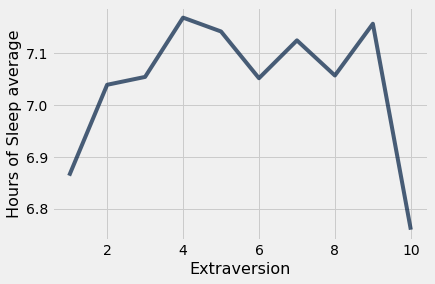

In [27]:
by_extra.select(0,2).plot('Extraversion')

## Grouping by Two Categories ##

## Pivot Tables ##

## NBA Data ##

In [ ]:
nba = Table.read_table('nba_salaries.csv').relabeled(3, 'SALARY')
nba

In [ ]:
# CHALLENGE QUESTION: for each team,
# amount paid to "starter" (player earning the most) in each position


In [ ]:
# CHALLENGE QUESTION: for each team,
# total amount paid to all "starters"
